<a href="https://www.kaggle.com/code/eugenetanake/basic-web-scraping-s-pt-4-practice?scriptVersionId=97778617" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import cufflinks as cf
init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.express as px
cf.go_offline()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



/kaggle/input/basic-web-scraping-s-pt-3-data-cleaning/webScrap3.csv
/kaggle/input/basic-web-scraping-s-pt-3-data-cleaning/__results__.html
/kaggle/input/basic-web-scraping-s-pt-3-data-cleaning/__resultx__.html
/kaggle/input/basic-web-scraping-s-pt-3-data-cleaning/__notebook__.ipynb
/kaggle/input/basic-web-scraping-s-pt-3-data-cleaning/__output__.json
/kaggle/input/basic-web-scraping-s-pt-3-data-cleaning/custom.css


In [2]:
df = pd.read_csv('/kaggle/input/basic-web-scraping-s-pt-3-data-cleaning/webScrap3.csv')
df

,course name,url,duration,by,viewer count,release date,likes,skill level,rating,rating max,skill level num
0,Career Wellness Nano Tips with Shadé Zahrai,https://www.linkedin.com/learning/career-welln...,3,By: Shadé Zahrai,181477,169,27606,Skill level: Beginner,4.7,out of 5,2.0
1,Job Interview Nano Tips with Madeline Mann,https://www.linkedin.com/learning/job-intervie...,3,By: Madeline Mann,537464,169,12301,Skill level: Beginner,4.5,out of 5,2.0
2,Be the Manager People Won't Leave,https://www.linkedin.com/learning/be-the-manag...,28,By: Laurie Ruettimann,1071484,258,83945,Skill level: Beginner + Intermediate,4.7,out of 5,2.5
3,Revit: AR and VR Workflows,https://www.linkedin.com/learning/revit-ar-and...,120,By: Logan Smith,243740,1294,16260,Skill level: Intermediate,4.8,out of 5,3.0
4,Expert Tips for Answering Common Interview Que...,https://www.linkedin.com/learning/expert-tips-...,74,"By: Jenny Foss, LinkedIn Learning Instructors,...",1641135,1179,10675,Skill level: Beginner,4.8,out of 5,2.0
5,Excel: VLOOKUP and XLOOKUP for Beginners,https://www.linkedin.com/learning/excel-vlooku...,19,By: Jess Stratton,785513,304,80803,Skill level: Beginner,4.7,out of 5,2.0
6,Excel Essential Training (Office 365/Microsoft...,https://www.linkedin.com/learning/excel-essent...,137,By: Dennis Taylor,1484225,1347,72033,Skill level: Beginner + Intermediate,4.8,out of 5,2.5
7,Dan Ariely on Making Decisions,https://www.linkedin.com/learning/dan-ariely-o...,57,By: Dan Ariely,400407,135,10516,Skill level: General,4.7,out of 5,1.0
8,Animating in Historical Styles,https://www.linkedin.com/learning/animating-in...,159,By: Dermot O' Connor,339773,350,5281,Skill level: Beginner,4.8,out of 5,2.0
9,SOLIDWORKS: Modeling a Bicycle,https://www.linkedin.com/learning/solidworks-m...,123,By: Johno Ellison,102501,395,14166,Skill level: Beginner,4.7,out of 5,2.0


Logically speaking, the only independent variables in this table are Title, duration, release date.

If there are no foul play, the number of likes should not exceed the viewer count. Though we can always double check on that.

The case is slightly similar for rating. For the rating to exist, there has to be viewers, the rating then encourage more viewers. There are also chances of rating bias.

In [3]:
weirdLikesCount = 0
for i in range(len(df)):
    if df['likes'][i] > df['viewer count'][i]:
        weirdLikesCount +=1
weirdLikesCount

0

As expected, there should not be any like count higher than viewer count.

Let us take a look at the distribution of the values.

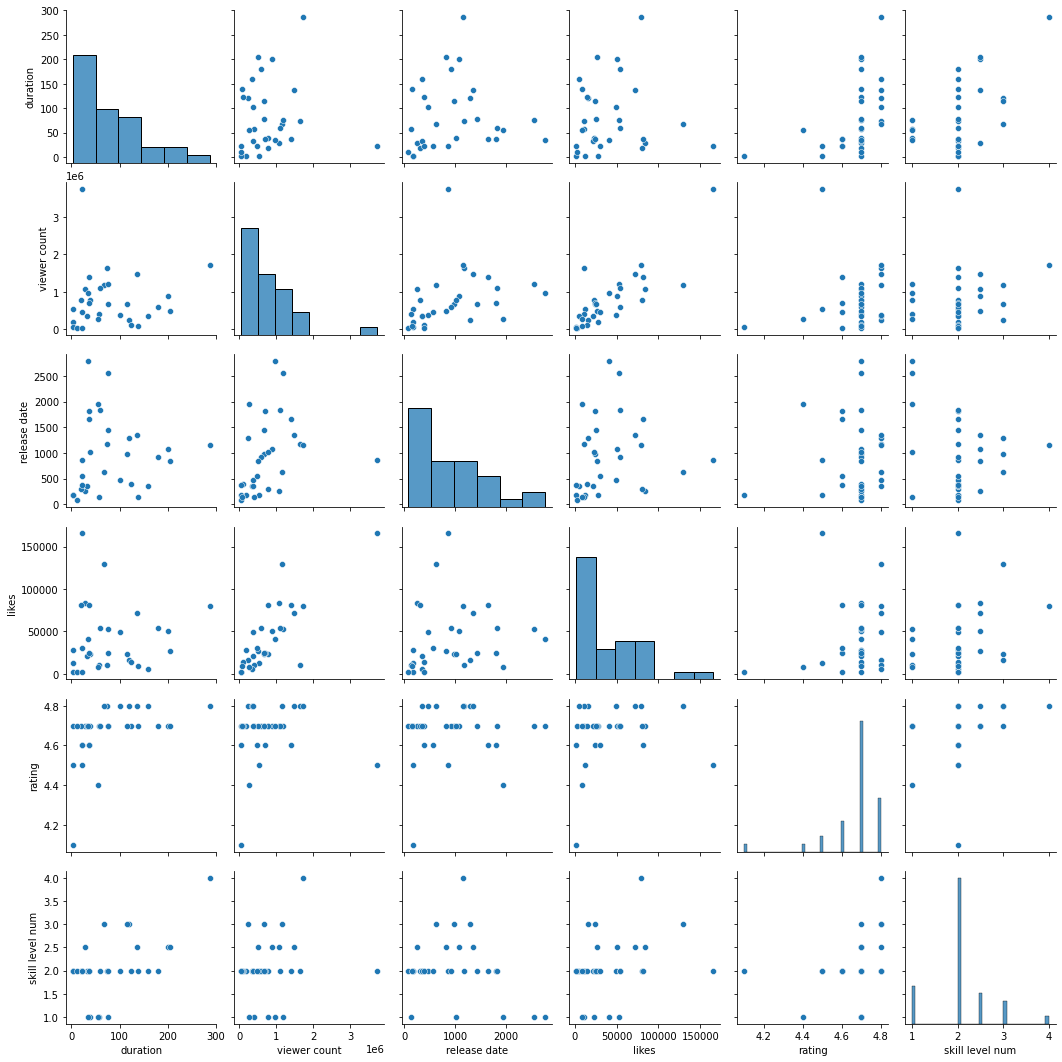

In [4]:
sns.pairplot(df)

Anything beyond this point is merely practice. There are too many issues with this dataset. There are extreme outliers as I am only able to extract 50 courses for non-paying accounts. The dataset is not going to be accurate due to lacking important features such as the weight of the instructor and the weight of the course name. 

Let us take a look at the correlations.

In [5]:
dataf = df[['viewer count','duration','release date','likes','skill level num','rating']]
dataf.head()

,viewer count,duration,release date,likes,skill level num,rating
0,181477,3,169,27606,2.0,4.7
1,537464,3,169,12301,2.0,4.5
2,1071484,28,258,83945,2.5,4.7
3,243740,120,1294,16260,3.0,4.8
4,1641135,74,1179,10675,2.0,4.8


In [6]:
dfcorr = dataf.corr()
dfcorr

,viewer count,duration,release date,likes,skill level num,rating
viewer count,1.000000,0.057629,0.333952,0.809398,0.161920,0.074884
duration,0.057629,1.000000,0.106384,0.049543,0.530754,0.457429
release date,0.333952,0.106384,1.000000,0.155643,-0.228460,0.070198
likes,0.809398,0.049543,0.155643,1.000000,0.299407,0.142847
skill level num,0.161920,0.530754,-0.228460,0.299407,1.000000,0.290222
rating,0.074884,0.457429,0.070198,0.142847,0.290222,1.000000


<AxesSubplot:>

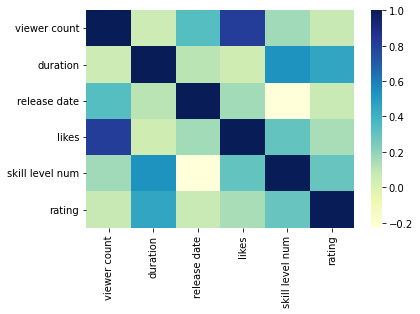

In [7]:
sns.heatmap(dfcorr,xticklabels=dfcorr.columns,yticklabels=dfcorr.columns,cmap="YlGnBu")

As expected, there is a high correlation between likes and viewer count. Let us take a look at the variation inflation factor to detect if there are Multicollinearity.

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = dataf.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataf.values, i)
                          for i in range(len(dataf.columns))]

In [9]:
vif_data

,feature,VIF
0,viewer count,7.184955
1,duration,3.598981
2,release date,3.662861
3,likes,7.032124
4,skill level num,21.624129
5,rating,18.671879


The information I looked up was that generally a value of 5 and above indicates high multicollinearity.

Now I'm going to practice ploting graphs via plotly

In [10]:
# Data
tempdf = df[['course name','viewer count','likes','skill level']]
tempdf.head()

,course name,viewer count,likes,skill level
0,Career Wellness Nano Tips with Shadé Zahrai,181477,27606,Skill level: Beginner
1,Job Interview Nano Tips with Madeline Mann,537464,12301,Skill level: Beginner
2,Be the Manager People Won't Leave,1071484,83945,Skill level: Beginner + Intermediate
3,Revit: AR and VR Workflows,243740,16260,Skill level: Intermediate
4,Expert Tips for Answering Common Interview Que...,1641135,10675,Skill level: Beginner


In [11]:
px.scatter(tempdf,
           x = 'viewer count',
           y='likes',
           color = 'skill level',
           hover_data = tempdf.columns.tolist())

In [12]:
# An idea would be that we should take a look at why "Expert Tips for Answering Common Interview Questions is not well liked"

In [13]:
# Data
tempdf = df[['course name','by']]
tempdf = tempdf.groupby('by').size()
tempdf = tempdf.reset_index()
tempdf = tempdf.rename({0:'Count'},axis = 1)
tempdf = tempdf.sort_values('Count',ascending = False)
tempdf

,by,Count
7,By: Dennis Taylor,3
22,By: Pete Mockaitis | How to Be Awesome at Your...,2
9,By: Dorie Clark,2
11,By: Gini von Courter,2
0,By: American Negotiation Institute and Kwame C...,1
15,By: Johno Ellison,1
25,By: Shadé Zahrai,1
24,By: Selena Rezvani,1
23,By: Samantha Bennett and Madecraft,1
21,By: Oliver Schinkten,1


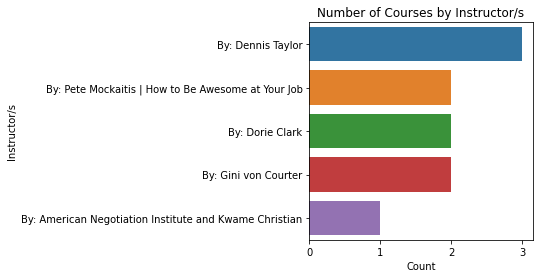

In [14]:
plt.figure(figsize = (4,4))
sns.barplot(x='Count',y='by',data = tempdf.iloc[0:5])
plt.title('Number of Courses by Instructor/s')
plt.xticks(range(4))
plt.ylabel('Instructor/s')
plt.xlabel('Count')
plt.show()

Although too little information, it might suggest that Dennis Taylor is an experienced instructor with more than 3 courses under his tutelage.

In [15]:
# Data
tempdf = df[['skill level','course name']].groupby('skill level').size()
tempdf = tempdf.reset_index()
tempdf = tempdf.rename({0:'Count'},axis = 1)
tempdf

,skill level,Count
0,Skill level: Advanced,1
1,Skill level: Beginner,19
2,Skill level: Beginner + Intermediate,4
3,Skill level: General,5
4,Skill level: Intermediate,3


In [16]:
order = ['Skill level: General',
         'Skill level: Beginner',
         'Skill level: Beginner + Intermediate',
         'Skill level: Intermediate',
         'Skill level: Advanced']

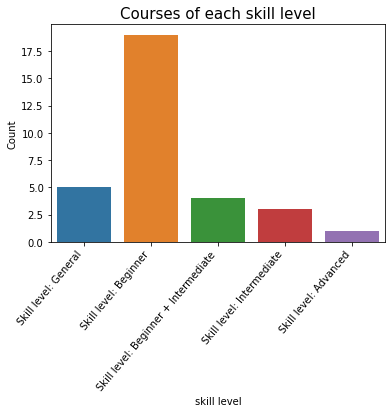

In [17]:
sns.barplot(y='Count',x='skill level',data = tempdf, order = order)
plt.xticks(rotation = 50,ha = 'right')
plt.title('Courses of each skill level', fontsize = 15)
plt.show()

Hopefully there are more courses of higher skill level outside of these samples.

This is the end of the practice page. I will be finding a better dataset to show better visualizations. Thanks for viewing!